In [1]:
# from project_lib import Project
# project = Project(project_id='d62e55cc-6947-4438-bbfd-edef5cb77250', project_access_token='p-06965b1402c22d85d5926f8fb154e61b691fba26')
# pc = project.project_context

# 1. Business Understanding

Returns are part of the business model of many fashion stores. The return rate of a fictitious company is about 50%, which unnecessarily costs the company a lot of money. In addition: Especially in the
fashion trade in particular, there are many customers who know before they place their order that they are
that they are very likely to send the item back. For example, they order the same shirt in different sizes because they are not sure which one will fit.
not sure which one will fit. Is it possible to use machine learning approaches to determine the size by given
parameters and minimize returns due to wrong size?

# 2. Data and Data Understanding

The dataset was downloaded from Kaggle and originated from
ModCloth, an online store for women's clothing. The data is about actual clothes sold and the additional information of the
additional information of the fit at the customer.
The data includes: item_id, waist, size, quality, cup size, hips, bra size, category,
bust height, length, fit, user_id, shoe size, shoe width, review_summary and
review_text.

## 2.1. Import of Relevant Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report

## 2.2. Read Data

In [3]:
# my_file = project.get_file("modcloth_final_data.json")
# my_file.seek(0)

my_file = "https://storage.googleapis.com/ml-service-repository-datastorage/Size_prediction_for_online_fashion_retailer_modcloth_final_data.json"
df = pd.read_json(my_file, lines = True)

df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


## 2.3. Data Cleaning

In [4]:
df[df.duplicated(keep=False)]

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
1230,126885,NaN,32,3.0,d,53.0,42.0,new,NaN,5ft 3in,Brandy,slightly long,fit,94385,NaN,NaN,NaN,NaN
1231,126885,NaN,32,3.0,d,53.0,42.0,new,NaN,5ft 3in,Brandy,slightly long,fit,94385,NaN,NaN,NaN,NaN
1264,126885,NaN,26,3.0,d,NaN,40.0,new,NaN,5ft 9in,megmattmt,just right,fit,67002,10.5,wide,NaN,NaN
1265,126885,NaN,26,3.0,d,NaN,40.0,new,NaN,5ft 9in,megmattmt,just right,fit,67002,10.5,wide,NaN,NaN
1370,126885,NaN,38,4.0,c,49.0,48.0,new,NaN,5ft 11in,kelli.andrews,very long,large,826087,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81598,806479,NaN,20,5.0,c,42.0,38.0,outerwear,NaN,5ft 6in,karinabuendia,slightly long,large,756267,10.0,NaN,I loved this coat since t,I loved this coat since the moment I saw it bu...
82085,806856,NaN,20,5.0,j,47.0,36.0,outerwear,47,5ft 10in,bookworm.bedore,just right,fit,315616,10.5,average,Love it! Fit and material,Love it! Fit and material is A+.
82086,806856,NaN,20,5.0,j,47.0,36.0,outerwear,47,5ft 10in,bookworm.bedore,just right,fit,315616,10.5,average,Love it! Fit and material,Love it! Fit and material is A+.
82398,806856,NaN,4,5.0,NaN,NaN,NaN,outerwear,NaN,5ft 5in,ktanner779,just right,large,858162,NaN,NaN,LOVE this coat. Super war,"LOVE this coat. Super warm, beautiful color an..."


In [5]:
df = df.drop_duplicates(keep='first')

In [6]:
df.describe(include='all')

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
count,82413.000000,2881.000000,82413.000000,82345.000000,76185,55804.000000,76421.000000,82413,11796,81308,82413,82378,82413,82413.000000,27790.000000,18521,75704,75704
unique,NaN,NaN,NaN,NaN,12,NaN,NaN,7,40,41,32429,5,3,NaN,NaN,3,61713,73313
top,NaN,NaN,NaN,NaN,c,NaN,NaN,new,36,5ft 4in,Sarah,just right,fit,NaN,NaN,average,Love it!,Love it!
freq,NaN,NaN,NaN,NaN,18270,NaN,NaN,21395,2042,11876,727,61660,56516,NaN,NaN,13030,184,152
mean,469417.251295,31.319681,12.659714,3.949092,NaN,40.358559,35.971605,NaN,NaN,NaN,NaN,NaN,NaN,498819.325701,8.145592,NaN,NaN,NaN
std,214067.804253,5.303712,8.270768,0.992837,NaN,5.827906,3.224445,NaN,NaN,NaN,NaN,NaN,NaN,286325.583966,1.335898,NaN,NaN,NaN
min,123373.000000,20.000000,0.000000,1.000000,NaN,30.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,NaN,NaN,NaN
25%,314980.000000,28.000000,8.000000,3.000000,NaN,36.000000,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,252928.000000,7.000000,NaN,NaN,NaN
50%,454030.000000,30.000000,12.000000,4.000000,NaN,39.000000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,497756.000000,8.000000,NaN,NaN,NaN
75%,658440.000000,34.000000,15.000000,5.000000,NaN,43.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,744641.000000,9.000000,NaN,NaN,NaN


In [7]:
df.isnull().sum()

item_id               0
waist             79532
size                  0
quality              68
cup size           6228
hips              26609
bra size           5992
category              0
bust              70617
height             1105
user_name             0
length               35
fit                   0
user_id               0
shoe size         54623
shoe width        63892
review_summary     6709
review_text        6709
dtype: int64

In [8]:
df.dtypes

item_id             int64
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

In [9]:
df.shape[1]

18

In [10]:
df.shape[0]

82413

# 3. Data Preparation


## 3.1. Test for Multicollinearity

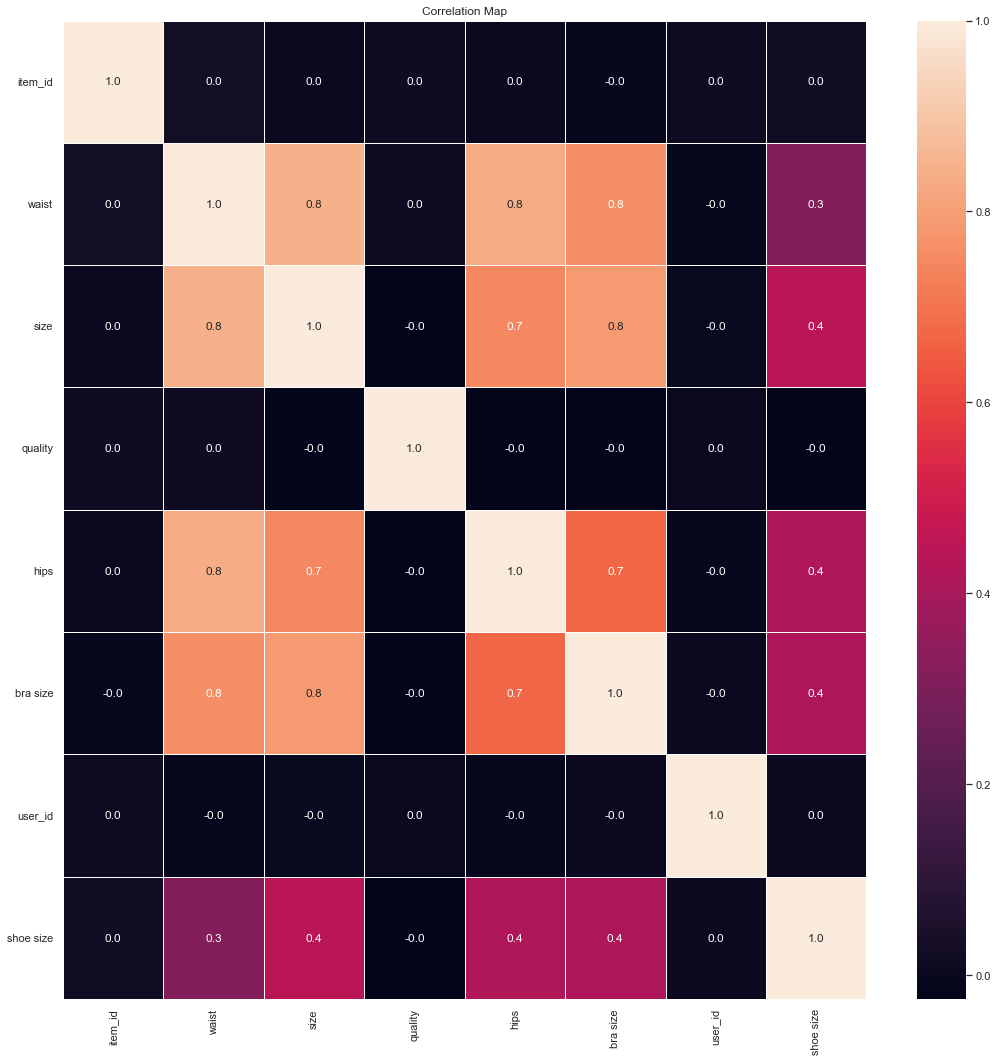

In [11]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [12]:
df = df.drop(['user_id'], axis=1)

In [13]:
df = df.drop(['user_name'], axis=1)

In [14]:
df = df.drop(['item_id'], axis=1)

In [15]:
df = df.drop(['review_text'], axis=1)

In [16]:
df = df.drop(['review_summary'], axis=1)

In [17]:
df = df.drop(['shoe width'], axis=1)

In [18]:
df = df.drop(['shoe size'], axis=1)

In [19]:
df = df.drop(['waist'], axis=1)

In [20]:
df = df.drop(['bust'], axis=1)

In [21]:
df = df.dropna(axis = 0, subset = ['hips'])

In [22]:
df = df.dropna(axis = 0, subset = ['cup size'])

In [23]:
df = df.dropna(axis = 0, subset = ['height'])

In [24]:
df = df.drop(['quality'], axis=1)

In [25]:
df = df.drop(['length'], axis=1)

In [26]:
df = df.dropna(axis = 0, subset = ['bra size'])

In [27]:
df.loc[(df.fit == 'small'),'fit']=0

In [28]:
df.loc[(df.fit == 'fit'),'fit']=1

In [29]:
df.loc[(df.fit == 'large'),'fit']=0

In [30]:
df["fit"] = df["fit"].astype(str).astype(int)

In [31]:
df = df[df.fit != 0]

In [32]:
df.fit.unique()

array([1])

In [33]:
df.isnull().sum()

size        0
cup size    0
hips        0
bra size    0
category    0
height      0
fit         0
dtype: int64

In [34]:
df.describe(include='all')

,size,cup size,hips,bra size,category,height,fit
count,37187.000000,37187,37187.000000,37187.000000,37187,37187,37187.0
unique,NaN,12,NaN,NaN,7,32,NaN
top,NaN,c,NaN,NaN,new,5ft 4in,NaN
freq,NaN,8949,NaN,NaN,9463,5625,NaN
mean,11.794310,NaN,40.066529,35.669024,NaN,NaN,1.0
std,7.661827,NaN,5.692938,3.101530,NaN,NaN,0.0
min,0.000000,NaN,30.000000,28.000000,NaN,NaN,1.0
25%,8.000000,NaN,36.000000,34.000000,NaN,NaN,1.0
50%,10.000000,NaN,39.000000,36.000000,NaN,NaN,1.0
75%,15.000000,NaN,43.000000,38.000000,NaN,NaN,1.0


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = df[['bra size', 'fit', 'hips', 'size']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]
vif["Features"] = variable.columns

In [36]:
vif

,VIF,Features
0,2.666437,bra size
1,306.634974,fit
2,2.368706,hips
3,3.356016,size


In [37]:
df = df.drop(['fit'], axis=1)

array([[<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'hips'}>],
       [<AxesSubplot:title={'center':'bra size'}>, <AxesSubplot:>]],
      dtype=object)

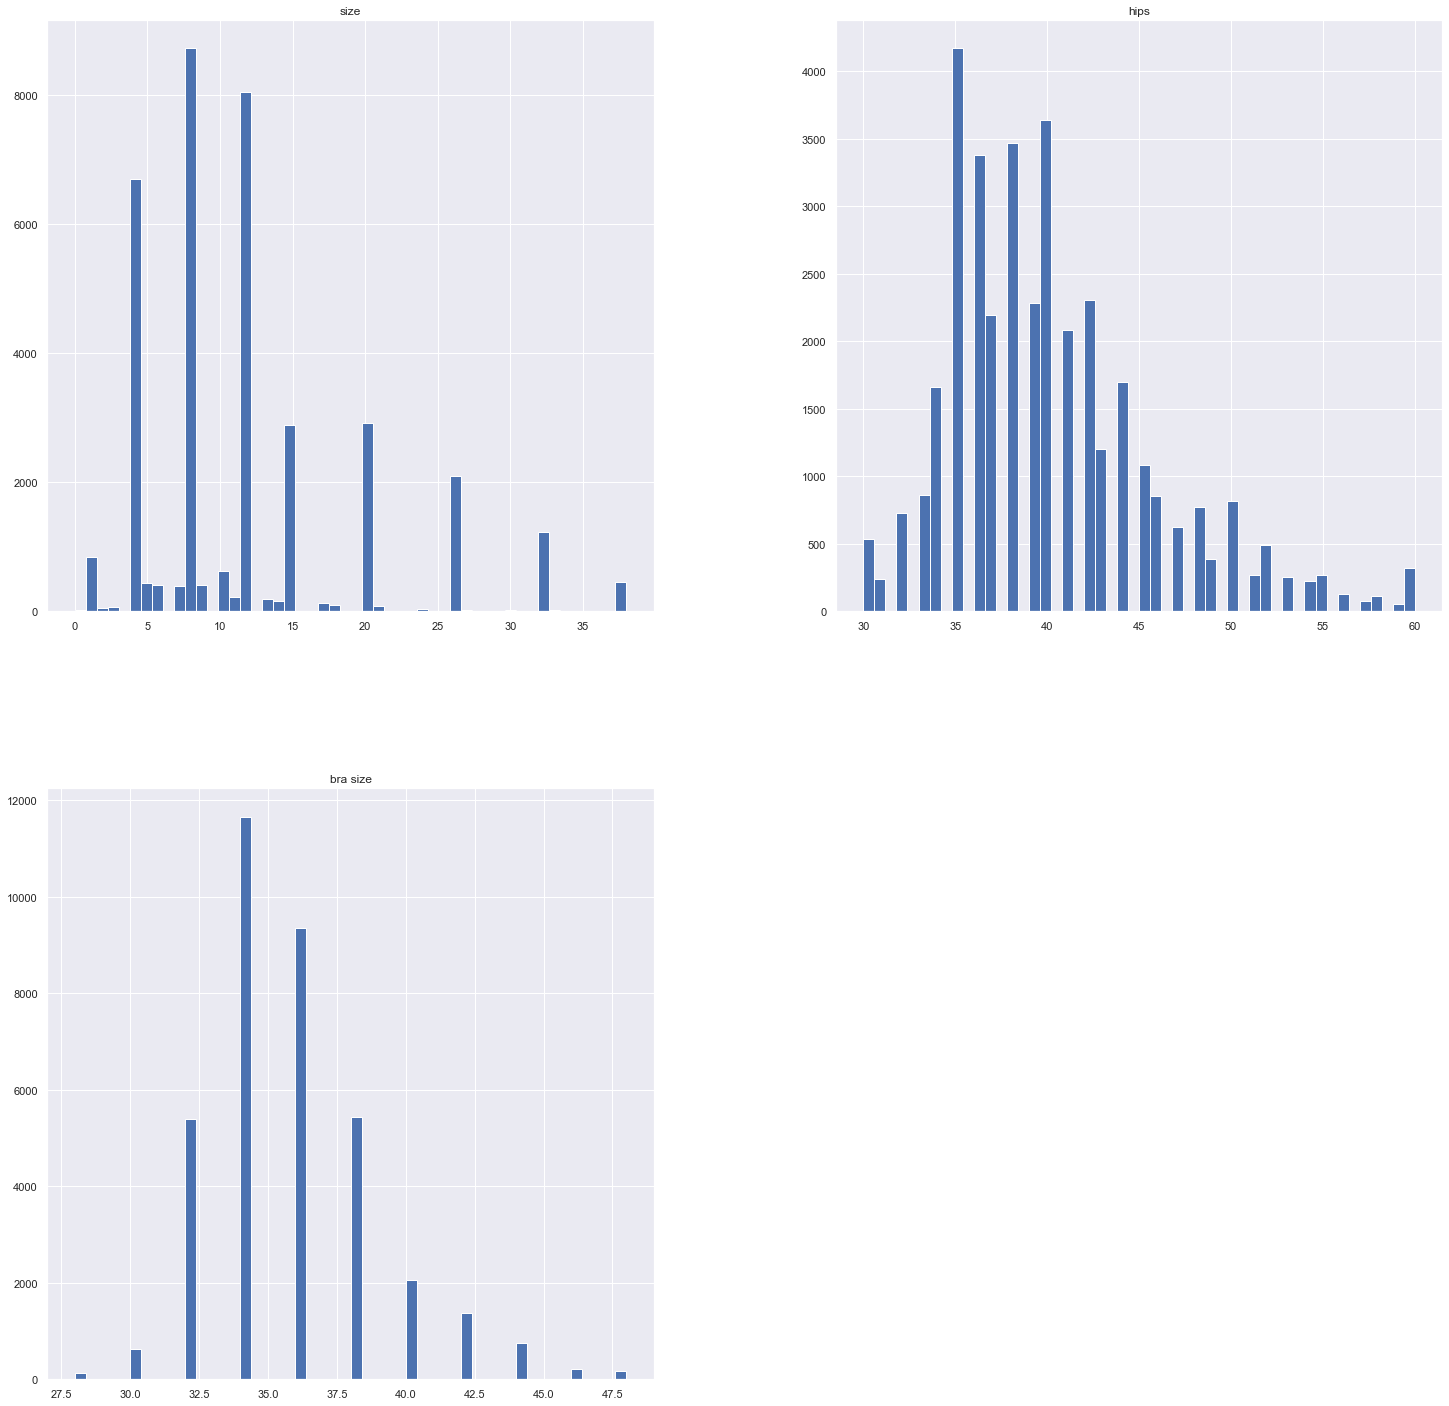

In [38]:
df.hist(figsize=(25,25), bins=50)

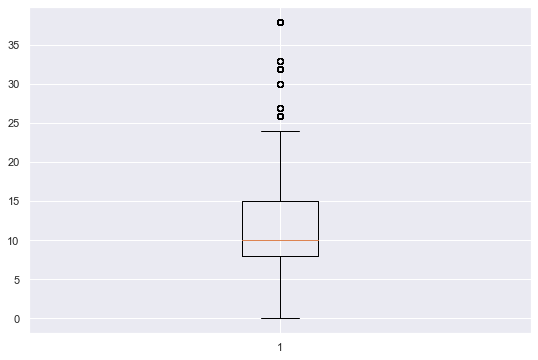

In [39]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(df['size'])

In [40]:
df.head()

,size,cup size,hips,bra size,category,height
9,13,dd/e,41.0,36.0,new,5ft 6in
14,3,b,36.0,34.0,new,5ft 3in
15,27,c,50.0,40.0,new,5ft 4in
16,18,d,44.0,36.0,new,5ft 2in
19,9,dd/e,35.0,34.0,new,5ft 5in


## 3.2. Recoding of Categorical Variables

In [41]:
df_dummies = pd.get_dummies(df, drop_first=True) # 0-1 encoding for categorical values
df_dummies.head()

,size,hips,bra size,cup size_aa,cup size_b,cup size_c,cup size_d,cup size_dd/e,cup size_ddd/f,cup size_dddd/g,...,height_6ft,height_6ft 1in,height_6ft 2in,height_6ft 3in,height_6ft 4in,height_6ft 5in,height_6ft 6in,height_6ft 8in,height_7ft 11in,height_7ft 7in
9,13,41.0,36.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3,36.0,34.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,27,50.0,40.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,18,44.0,36.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,9,35.0,34.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#project.save_data("df_dummies.csv", df_dummies.to_csv(index=False))

In [43]:
df_dummies.describe(include="all")

,size,hips,bra size,cup size_aa,cup size_b,cup size_c,cup size_d,cup size_dd/e,cup size_ddd/f,cup size_dddd/g,...,height_6ft,height_6ft 1in,height_6ft 2in,height_6ft 3in,height_6ft 4in,height_6ft 5in,height_6ft 6in,height_6ft 8in,height_7ft 11in,height_7ft 7in
count,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,...,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000,37187.000000
mean,11.794310,40.066529,35.669024,0.004410,0.202517,0.240649,0.210047,0.157932,0.072929,0.025708,...,0.007072,0.001748,0.001183,0.000054,0.000027,0.000134,0.000054,0.000027,0.000215,0.000027
std,7.661827,5.692938,3.101530,0.066263,0.401881,0.427483,0.407347,0.364682,0.260023,0.158265,...,0.083801,0.041772,0.034378,0.007334,0.005186,0.011595,0.007334,0.005186,0.014666,0.005186
min,0.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,36.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,39.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,43.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,60.000000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df.shape[1]

6

In [45]:
df.shape[0]

37187

# 4. Modelling and Evaluation

In [46]:
df_dummies.head()

,size,hips,bra size,cup size_aa,cup size_b,cup size_c,cup size_d,cup size_dd/e,cup size_ddd/f,cup size_dddd/g,...,height_6ft,height_6ft 1in,height_6ft 2in,height_6ft 3in,height_6ft 4in,height_6ft 5in,height_6ft 6in,height_6ft 8in,height_7ft 11in,height_7ft 7in
9,13,41.0,36.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3,36.0,34.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,27,50.0,40.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,18,44.0,36.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,9,35.0,34.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.1. Test and Train Data

In [47]:
target = df_dummies['size']
predictors = df_dummies.drop(['size'], axis = 1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=365) 

## 4.2. Feature Scaling

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4.3. Evaluation

In [50]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [51]:
print('training performance')
print(reg.score(X_train,y_train))
print('test performance')
print(reg.score(X_test,y_test))

training performance
0.7372938259154405
test performance
0.7370702534364143


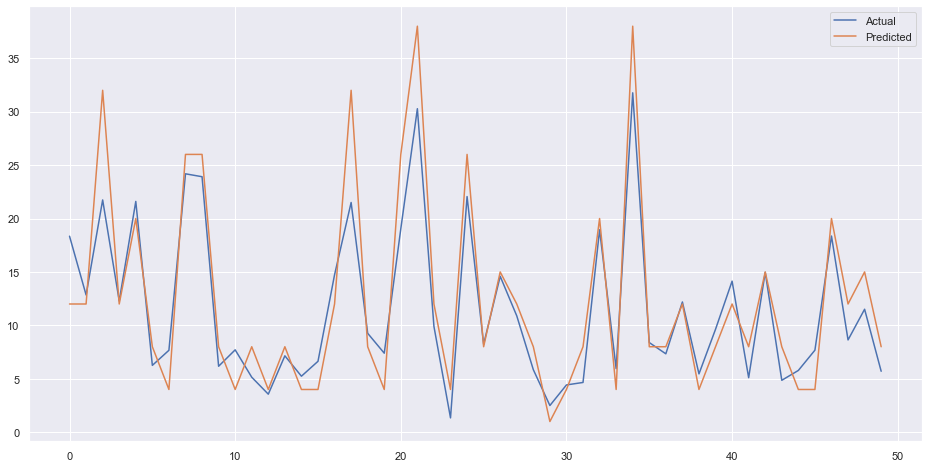

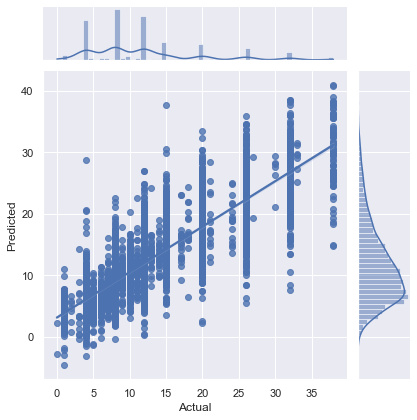

In [52]:
y_pred = reg.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7370702534364143

# 5. Deployment

In [54]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

ModuleNotFoundError: No module named 'watson_machine_learning_client'

In [ ]:
wml_credentials = {
  "apikey": "Ws_HvUo65v201ierGepvN2PI5pQ3WlbzIOio-ahE7ND1",
  "iam_apikey_description": "Auto-generated for key c72e3965-9ccf-4fb2-847b-29bef61c7e9c",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/9361f41bc2f9437da10e31a36f3b5ff6::serviceid:ServiceId-638ec772-5914-49bb-8589-b89e150e8b2d",
  "instance_id": "ffed2be6-7e21-4d1b-88ff-d79e1a4cb73a",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [ ]:
wml_client = WatsonMachineLearningAPIClient(wml_credentials)

In [ ]:
wml_client.repository.list()

------------------------------------  ---------------------  ------------------------  -----------------  -----------------
GUID                                  NAME                   CREATED                   FRAMEWORK          TYPE
192247bb-0d40-46a5-a6d1-1948f35193a5  Zalando_Hausarbeit     2020-07-11T16:33:07.319Z  scikit-learn-0.20  model
04d520bf-5eb5-4876-8f28-8dea5cc22edd  AI Zalando Deployment  2020-07-11T16:33:11.684Z  scikit-learn-0.20  online deployment
------------------------------------  ---------------------  ------------------------  -----------------  -----------------


In [ ]:
metadata = {
        wml_client.repository.ModelMetaNames.NAME: 'Zalando_Hausarbeit',
        wml_client.repository.ModelMetaNames.DESCRIPTION: 'Linear Regression - Target Size',
        wml_client.repository.ModelMetaNames.AUTHOR_NAME: 'MertHaybat'
}

In [ ]:
stored_model = wml_client.repository.store_model(reg, meta_props=metadata)

In [ ]:
published_model_uid = wml_client.repository.get_model_uid(stored_model)

In [ ]:
created_deployment = wml_client.deployments.create(published_model_uid, name="AI Zalando Deployment")
scoring_endpoint = wml_client.deployments.get_scoring_url(created_deployment)



#######################################################################################

Synchronous deployment creation for uid: '192247bb-0d40-46a5-a6d1-1948f35193a5' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='04d520bf-5eb5-4876-8f28-8dea5cc22edd'
------------------------------------------------------------------------------------------------


